In [0]:
from google.colab import drive
drive.mount('/content/drive')

#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import load_model
import h5py
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import os
import sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from gtts import gTTS
from io import BytesIO


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install gTTs

# **RED NEURONAL**

In [0]:
#Carga de datasets
X= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Proyecto_VC/X_NEW.csv", header=None).values.astype(float)

In [0]:
y= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Proyecto_VC/y_NEW.csv", header=None).values

In [0]:
print ('Caracteristicas de Train:',X.shape, type(X))

Caracteristicas de Train: (832, 784) <class 'numpy.ndarray'>


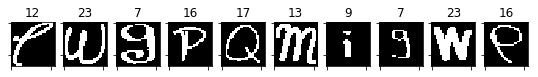

In [0]:
#Visualizar algunos datos

perm = np.random.permutation(range(X.shape[0]))[0:10]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(30,30))
print 
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(2,32,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

In [0]:
#Balanceo de clases:
#Cantiadad de datos por cada clase-test 
for i in np.unique(y):
    print (i, np.sum(y==i)),

1.0 30
2.0 32
3.0 32
4.0 32
5.0 32
6.0 32
7.0 32
8.0 32
9.0 32
10.0 32
11.0 32
12.0 31
13.0 32
14.0 32
15.0 33
16.0 32
17.0 33
18.0 32
19.0 33
20.0 32
21.0 32
22.0 32
23.0 32
24.0 32
25.0 32
26.0 32


## Arquitectura CNN 

In [0]:
#El -1 es para indexar la imagen 
X = X.reshape([-1, 28,28,1])
X= X.astype('float32')
# Normalizar de 0-255 a  0-1
X= X / 255

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)


# one hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator( featurewise_center=True, rotation_range=10)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)



In [0]:

#Crear modelo
model_CNN1 =  keras.models.Sequential()
model_CNN1.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model_CNN1.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN1.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN1.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN1.add(keras.layers.Dropout(0.25))
model_CNN1.add(keras.layers.Flatten())
model_CNN1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN1.add(keras.layers.Dropout(0.5))
model_CNN1.add(keras.layers.Dense(num_classes, activation='softmax'))

model_CNN1.summary()

# Compile model

model_CNN1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
#40--10
# fits the model on batches with real-time data augmentation:
history= model_CNN1.fit_generator(datagen.flow(X_train, y_train, batch_size=100),validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) / 100, epochs=40)
#model_CNN1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model_CNN1.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

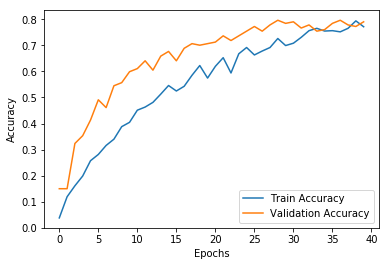

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model_lenet5 = 'modelo_CNN1_own.h5'
model_CNN1.save(model_lenet5)

In [0]:

#Para cargar el modelo
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model_loaded = load_model('/content/drive/My Drive/Colab Notebooks/Proyecto_VC/modelo_CNN1_own3.h5')

In [0]:
# evaluate loaded model on test data
model_loaded.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model_loaded.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % ("Accuracy:", score[1]*100))

Accuracy:: 95.21%


## ***DEEP FEATURES:***

In [0]:
arr_h_train = []
arr_h_test = []





for i in X_train: 
    im_ = cv.resize(i,(28,28))
    im_ = tf.contrib.keras.preprocessing.image.img_to_array(im_)
    im_ = np.expand_dims(im_, axis=0);
    arr_h_train.append(im_)
  


for i in X_test: 
    im_ = cv.resize(i,(28,28))
    im_ = tf.contrib.keras.preprocessing.image.img_to_array(im_)
    im_ = np.expand_dims(im_, axis=0);
    arr_h_test.append(im_)

In [0]:
arr_h_train = np.array(arr_h_train)
arr_h_test = np.array(arr_h_test)

In [0]:
model_df = tf.keras.models.Model(inputs=model_loaded.input, 
                        outputs=model_loaded.get_layer('conv2d_59').output)

In [0]:
new_train=[]
new_test=[]
for i in arr_h_train: 
    features = model_df.predict(i)
    f=features[0,:,:]
    f = f.reshape(64,14,14) 
    ima=[]
    for j in f:
        m=j.reshape(14*14) 
        ima.append(m)
    
    new_train.append(np.concatenate((ima), axis=0))
   
    

for i in arr_h_test: 
   
    features = model_df.predict(i)
    f=features[0,:,:]
    f = f.reshape(64,14,14) 
    ima=[]
    for j in f:
        m=j.reshape(14*14) 
        ima.append(m)
    
    new_test.append(np.concatenate((ima), axis=0))



In [0]:
new_train=np.r_[new_train]
new_test=np.r_[new_test]

In [0]:
pca=PCA(n_components=400)
x_train = pca.fit_transform(new_train)
x_test = pca.transform (new_test)

In [0]:
print(x_test.shape)
print(x_train.shape)

(167, 400)
(665, 400)


In [0]:
x_train = x_train.reshape([-1,400,1, 1])
x_test = x_test.reshape([-1, 400,1, 1])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test /= 255
x_train /= 255


In [0]:
print(x_test.shape)
print(x_train.shape)

(167, 400, 1, 1)
(665, 400, 1, 1)


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten( input_shape=[400, 1, 1]))
model.add(tf.keras.layers.Dense(units=300, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=200, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=27, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_82 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_83 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_84 (Dense)             (None, 27)                2727      
Total params: 203,327
Trainable params: 203,327
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=10, batch_size=100, validation_data=(x_test, y_test))

Train on 665 samples, validate on 167 samples
Epoch 1/10
665/665 [==============================] - 2s 2ms/sample - loss: 0.0851 - acc: 0.9504 - val_loss: 5.0959 - val_acc: 0.2395
Epoch 2/10
665/665 [==============================] - 0s 115us/sample - loss: 0.0737 - acc: 0.9564 - val_loss: 5.2153 - val_acc: 0.2216
Epoch 3/10
665/665 [==============================] - 0s 104us/sample - loss: 0.0706 - acc: 0.9594 - val_loss: 5.1781 - val_acc: 0.2335
Epoch 4/10
665/665 [==============================] - 0s 120us/sample - loss: 0.0698 - acc: 0.9579 - val_loss: 5.1642 - val_acc: 0.2335
Epoch 5/10
665/665 [==============================] - 0s 100us/sample - loss: 0.0690 - acc: 0.9594 - val_loss: 5.1810 - val_acc: 0.2395
Epoch 6/10
665/665 [==============================] - 0s 108us/sample - loss: 0.0674 - acc: 0.9609 - val_loss: 5.1393 - val_acc: 0.2275
Epoch 7/10
665/665 [==============================] - 0s 129us/sample - loss: 0.0656 - acc: 0.9594 - val_loss: 5.1949 - val_acc: 0.2335
Epoc

## ***TRANSFER LEARNING:***

In [0]:

#Para cargar el modelo
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model_MNIST = load_model('/content/drive/My Drive/Colab Notebooks/Proyecto_VC/modelo_CNN_MNIST.h5')

In [0]:
# evaluate loaded model on test data
model_MNIST.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
history= model_MNIST.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)

Train on 665 samples, validate on 167 samples
Epoch 1/50
665/665 [==============================] - 0s 534us/sample - loss: 1.2483 - acc: 0.7714 - val_loss: 0.5563 - val_acc: 0.8503
Epoch 2/50
665/665 [==============================] - 0s 116us/sample - loss: 0.7265 - acc: 0.8481 - val_loss: 0.4401 - val_acc: 0.8802
Epoch 3/50
665/665 [==============================] - 0s 115us/sample - loss: 0.4066 - acc: 0.9008 - val_loss: 0.4050 - val_acc: 0.8802
Epoch 4/50
665/665 [==============================] - 0s 110us/sample - loss: 0.2881 - acc: 0.9248 - val_loss: 0.3521 - val_acc: 0.8982
Epoch 5/50
665/665 [==============================] - 0s 118us/sample - loss: 0.2145 - acc: 0.9414 - val_loss: 0.3461 - val_acc: 0.9042
Epoch 6/50
665/665 [==============================] - 0s 117us/sample - loss: 0.1383 - acc: 0.9594 - val_loss: 0.3516 - val_acc: 0.8862
Epoch 7/50
665/665 [==============================] - 0s 112us/sample - loss: 0.0961 - acc: 0.9654 - val_loss: 0.3472 - val_acc: 0.8982
Ep

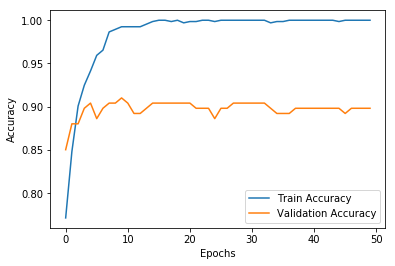

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
# evaluate loaded model on test data

score = model_MNIST.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % ("Accuracy:", score[1]*100))

Accuracy:: 89.82%


# **PROCESAMIENTO DE IMAGENES A EVALUAR**

In [0]:
def morfologia1(gray):
        gray2 = cv2.medianBlur (gray, 55)
        kernel1= cv2 . getStructuringElement ( cv2 . MORPH_ELLIPSE , ( 7, 7 )) 
        #kernel2= cv2 . getStructuringElement ( cv2 . MORPH_ELLIPSE , ( 4 , 4 )) 
        kernel4= cv2 . getStructuringElement ( cv2 . MORPH_ELLIPSE , (25 ,25 )) 


        th3 = cv2.adaptiveThreshold (gray2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                    cv2.THRESH_BINARY_INV, 47,2)

        #Erosión:
        kernel = np.ones((2,2),np.uint8)
        erosion = cv2.erode(th3,kernel,iterations = 1)

        #Apertura:
        apertura = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel1)

        #Dilatación:
        dilatacion2 = cv2.dilate(apertura,kernel4,iterations = 1)

        #Cierre
        kernel3  =  np . ones ((20,20), np . uint8 )
        cierre  =  cv2.morphologyEx(dilatacion2, cv2.MORPH_CLOSE, kernel3)

        #Erosión
        kernel5 = np.ones((5,5),np.uint8)
        erosion = cv2.erode(cierre ,kernel5,iterations = 1)

        plt.imshow(erosion,cmap = plt.cm.gray)
        im2, contornos, jerarquía = cv2.findContours (erosion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



        #Contornos
        contornos=np.r_[contornos]


        limites= []
        areas=[]
        for i in range(len(contornos)):
          #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
              l= cv2.boundingRect(contornos[i])
              lx=abs(l[0]-l[2])
              ly=abs(l[1]-l[3])
              if (lx==l[2]):
                continue
              elif(ly==l[3]):
                continue
              else:
                limites.append(l)
                puntos= l
                puntox1= puntos[0]
                puntox2=puntos[2]
                puntoy1= puntos[1]
                puntoy2= puntos[3]
                base= (puntox2-puntox1)
                altura= (puntoy2-puntoy1)
                areas.append(abs(base*altura))
        limites=np.r_[limites]      
        print (limites)


        #Graficar
        fig= plt.figure(figsize=(10,10))
        images=[]
        for i in range(len(limites)):
                ax=fig.add_subplot(1,len(limites),i+1)
                zona=limites[i]
                f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
                plt.imshow(f_image2,cmap = plt.cm.gray)
                images.append(f_image2)





        #Eliminar ruido 1    
        c=0  
        arreglo=list()
        while c< limites.shape[0]:

              for i in range(limites.shape[0]):
                if c != i:

                  if (limites[c,2]+limites[c,0])<= (limites[i,2]+limites[i,0]) and limites[c,0]>= limites[i,0] and (limites[c,3]+limites[c,1])<= (limites[i,3]+limites[i,1]) and limites[c,1]>= limites[i,1]:

                      arreglo.append(c)


                  else:
                    continue
                else:
                     continue

              c=c+1






        #Imagenes a eliminar
        arreglo
        a=len(arreglo)
        resta=limites.shape[0] - a

        #Modifica el vector limites
        limites_c=np.array(limites,dtype=bool)
        limites_c[arreglo]=False
        limites=limites[limites_c]
        limites=limites.reshape((resta,4))



        #Graficar
        #fig= plt.figure(figsize=(20,20))
        images=[]
        for i in range(len(limites)):
        #        ax=fig.add_subplot(1,len(limites),i+1)
                zona=limites[i]
                f_image2=gray[int(zona[1]-8):int(zona[1]+zona[3]+8),int(zona[0]-8):int(zona[0]+zona[2]+8)]
               # plt.imshow(f_image2,cmap = plt.cm.gray)
                images.append(f_image2)


        x_limite=[]
        imagesO=[]
        for j in range(len(limites)):
          puntos= limites[j]
          x_limite.append(puntos[0])

        lim=np.copy(x_limite)
        images=np.r_[images]

        c=0
        while c <len(lim):
            minimo= np.min(x_limite)
            ind= lim==minimo  
            n=images[ind]
            #print(ind)
            imagesO.append(n)
            x_limite.remove(minimo)
            c=c+1

        images_f=[]
        for k in range(len(imagesO)):
          n=imagesO[k]
          images_f.append(n[0])

        fig= plt.figure(figsize=(10,10))
        for i in range(len(images_f)):
            ax=fig.add_subplot(1,len(images_f),i+1)
            m=images_f[i]
            plt.imshow(m,cmap = plt.cm.gray)

        data=[]

        for i in range(len(images_f)):

              x= images_f[i]
              m = cv2.resize(x, (28,28), interpolation=cv2.INTER_AREA)  
              #Binarización
              _, m =  cv2.threshold(m,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
              m=m.reshape(784)
              data.append(m)
        data= np.r_[data]   
        
        return data




In [0]:
 
def morfologia2(gray):
  
          blur = cv2.GaussianBlur(gray ,(7,7),0)
          ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
          plt.imshow(th3,cmap = plt.cm.gray)
          kernel1= cv2 . getStructuringElement ( cv2 . MORPH_ELLIPSE , ( 5, 5 )) 
          kernel4= cv2 . getStructuringElement ( cv2 . MORPH_ELLIPSE , ( 8 ,8 )) 

          

          #Erosión
          kernel = np.ones((3,3),np.uint8)
          erosion = cv2.erode(th3,kernel,iterations = 1)

          #Apertura
          apertura = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel1)
          plt.imshow(apertura,cmap = plt.cm.gray)

          #Dilatación 
          dilatacion2 = cv2.dilate(apertura,kernel4,iterations = 1)

          #Cierre          
          kernel1  =  np . ones ((6,6), np . uint8 )
          cierre  =  cv2.morphologyEx(dilatacion2, cv2.MORPH_CLOSE, kernel1)

          #Erosión
          kernel = np.ones((5,5),np.uint8)
          erosion = cv2.erode(cierre ,kernel,iterations = 1)
          plt.imshow(erosion,cmap = plt.cm.gray)
          
          #Contornos
          im2, contornos, jerarquía = cv2.findContours (erosion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
          contornos=np.r_[contornos]

          limites= []
          areas=[]
          for i in range(len(contornos)):
          #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
                l= cv2.boundingRect(contornos[i])
                lx=abs(l[0]-l[2])
                ly=abs(l[1]-l[3])
                if (lx==l[2]):
                  continue
                elif(ly==l[3]):
                  continue
                else:
                  limites.append(l)
                  puntos= l
                  puntox1= puntos[0]
                  puntox2=puntos[2]
                  puntoy1= puntos[1]
                  puntoy2= puntos[3]
                  base= (puntox2-puntox1)
                  altura= (puntoy2-puntoy1)
                  areas.append(abs(base*altura))
          limites=np.r_[limites]      
          print (limites)



          #Graficar
          fig= plt.figure(figsize=(10,10))
          images=[]
          for i in range(len(limites)):
                  ax=fig.add_subplot(1,len(limites),i+1)
                  zona=limites[i]
                  f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
                  plt.imshow(f_image2,cmap = plt.cm.gray)
                  images.append(f_image2)





          #Eliminar ruido    
          c=0  
          arreglo=list()
          while c< limites.shape[0]:

                for i in range(limites.shape[0]):
                  if c != i:

                    if (limites[c,2]+limites[c,0])<= (limites[i,2]+limites[i,0]) and limites[c,0]>= limites[i,0] and (limites[c,3]+limites[c,1])<= (limites[i,3]+limites[i,1]) and limites[c,1]>= limites[i,1]:

                        arreglo.append(c)


                    else:
                      continue
                  else:
                       continue

                c=c+1






          #Imagenes a eliminar
          arreglo
          a=len(arreglo)
          resta=limites.shape[0] - a

          #Modifica el vector limites
          limites_c=np.array(limites,dtype=bool)
          limites_c[arreglo]=False
          limites=limites[limites_c]
          limites=limites.reshape((resta,4))



          #Grafica
          images=[]
          for i in range(len(limites)):
                  zona=limites[i]
                  f_image2=gray[int(zona[1]-8):int(zona[1]+zona[3]+8),int(zona[0]-8):int(zona[0]+zona[2]+8)]
                  images.append(f_image2)

          #Ordena el vector de imagenes
          x_limite=[]
          imagesO=[]
          for j in range(len(limites)):
            puntos= limites[j]
            x_limite.append(puntos[0])

          lim=np.copy(x_limite)
          images=np.r_[images]

          c=0
          while c <len(lim):
              minimo= np.min(x_limite)
              ind= lim==minimo  
              n=images[ind]
              imagesO.append(n)
              x_limite.remove(minimo)
              c=c+1

          images_f=[]
          for k in range(len(imagesO)):
            n=imagesO[k]
            images_f.append(n[0])

          fig= plt.figure(figsize=(10,10))
          for i in range(len(images_f)):
              ax=fig.add_subplot(1,len(images_f),i+1)
              m=images_f[i]
              plt.imshow(m,cmap = plt.cm.gray)

          data=[]

          for i in range(len(images_f)):

                x= images_f[i]
                m = cv2.resize(x, (28,28), interpolation=cv2.INTER_AREA)  
                
          #Binarización
                _, m =  cv2.threshold(m,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                m=m.reshape(784)
                data.append(m)
          data= np.r_[data]   
          
          return data



[[ 957   73  105  166]
 [ 545   66   83  156]
 [ 685   64   87  167]
 [ 707  101   29   53]
 [ 429   60   95  157]
 [ 818   56  114  168]
 [ 845   77   65   44]
 [1132   50   87  190]
 [ 271   48   99  167]
 [ 123   44  119  179]
 [ 143   65   79   51]]
2


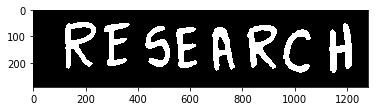

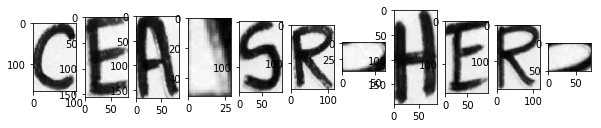

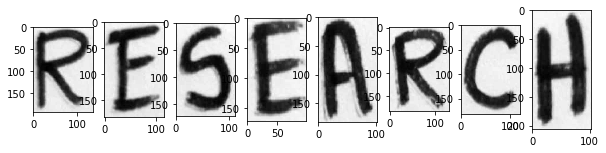

In [0]:

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Imagenes2/research4.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

histOrde=np.zeros((hist.shape[0],1))
hist2= np.copy(hist)
for i in range(hist.shape[0]):
  indMax=np.argmax(hist2)
  histOrde[i]=hist2[indMax]
  hist2[indMax]=0.0

m=np.mean(histOrde[:7])
umbral=m-m/10
cont=0

for i in range(7):
  if (histOrde[i] >= umbral):
      cont=cont+1
if (cont==7):
  
      data=morfologia1(gray)
      print(1)
  
  
  
else:
      data=morfologia2(gray)
      print(2)
  
  

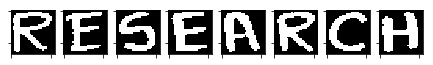

In [0]:
#Visualizar datos

fig = plt.figure(figsize=(30,30))
print 
for i in range(data.shape[0]):
    ax=fig.add_subplot(2,32,i+1)
    plt.imshow(data[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [0]:

data = data.reshape([-1, 28,28,1])
data= data.astype('float32')

In [0]:
y_pred = model_loaded.predict(x = data)
prueba = np.argmax(y_pred, axis=1)

In [0]:
caracteres=[]
for i in range(len(prueba)):
    
            if prueba[i]==1:  
               caracteres.append("A")
                     
            elif prueba[i]==2:  
              caracteres.append("B")
                     
            elif prueba[i]==3:
              caracteres.append("C")
                     
            elif prueba[i]==4: 
              caracteres.append("D")
              
            elif prueba[i]==5: 
              caracteres.append("E")
                     
            elif prueba[i]==6:  
              caracteres.append("F")
                     
            elif prueba[i]==7: 
              caracteres.append("G")
                     
            elif prueba[i]==8: 
              caracteres.append("H")
                     
            elif prueba[i]==9:  
              caracteres.append("I")
                     
            elif prueba[i]==10:
              caracteres.append("J")
                     
            elif prueba[i]==11:
              caracteres.append("K")
                     
            elif prueba[i]==12:
              caracteres.append("L")
                     
            elif prueba[i]==13:
              caracteres.append("M")
                     
            elif prueba[i]==14:
              caracteres.append("N")
                     
            elif prueba[i]==15: 
              caracteres.append("O")
                     
            elif prueba[i]==16:
              caracteres.append("P")
                     
            elif prueba[i]==17: 
              caracteres.append("Q")
                     
            elif prueba[i]==18: 
              caracteres.append("R")
                     
            elif prueba[i]==19: 
              caracteres.append("S")
                     
            elif prueba[i]==20: 
              caracteres.append("T")
                     
            elif prueba[i]==21: 
              caracteres.append("U")
                    
            elif prueba[i]==22: 
              caracteres.append("V")
                     
            elif prueba[i]==23: 
              caracteres.append("W")
                     
            elif prueba[i]==24:
              caracteres.append("X")
                     
            elif prueba[i]==25: 
              caracteres.append("Y")
                     
            elif prueba[i]==26: 
              caracteres.append("Z")
frase=""
frase= "".join([i for i in caracteres])
print(frase)

RESEARCH


In [0]:
def voz(frase, lang, nombre):
    file = gTTS(text=frase,lang=lang ,slow = False)
    file.save(nombre)
nombre=frase+".mp3"

In [0]:
voz(frase, "EN",nombre)